In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from ISLP import load_data

pd.options.mode.copy_on_write = True

Question 1

In [2]:
septDeliveries = [6, 7, 6, 7, 7, 6, 11, 4, 8, 6, 6, 12, 2, 8, 12, 5, 7, 8, 6, 11, 6, 8, 9, 11, 5, 9, 8, 9, 8, 12]

a.

In [3]:
septDeliveries.sort()
bin_depth = 10
#since the array is sorted already, I sliced the original array into 3 equal arrays of depth 10
lowBin = septDeliveries[0:bin_depth]
medBin = septDeliveries[bin_depth:2*bin_depth]
highBin = septDeliveries[2*bin_depth:]
#finding the mean of each bin
lowMean = np.mean(lowBin)
medMean = np.mean(medBin)
highMean = np.mean(highBin)
#smoothing each bin
lowSmooth = [lowMean] * len(lowBin)
medSmooth = [medMean] * len(medBin)
highSmooth = [highMean] * len(highBin)
print(lowSmooth)
print(medSmooth)
print(highSmooth)





[np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2), np.float64(5.2)]
[np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4), np.float64(7.4)]
[np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4), np.float64(10.4)]


I first sorted the array of deliviry days. Then I used array slicing to slice the array into smaller arrays of 10 elements each. Since I already sorted the array, the lowest elements would be in the first array, the medium elements would be in the second array, and the highest elemtents would be in the last array.

b.

In [4]:
#find bin width
min = septDeliveries[0]
max = septDeliveries[-1]
range = max - min
width = range/3
lowBin2 = []
medBin2 = []
highBin2 = []
for num in septDeliveries:
    if num < min + width:
        lowBin2.append(num)
    elif num < min + 2*width:
        medBin2.append(num)
    else:
        highBin2.append(num)
lowMedian = np.median(lowBin2)
medMedian = np.median(medBin2)
highMedian = np.median(highBin2)
lowSmooth2 = [lowMedian] * len(lowBin2)
medSmooth2 = [medMedian] * len(medBin2)
highSmooth2 = [highMedian] * len(highBin2)
print(lowSmooth2)
print(medSmooth2)
print(highSmooth2)
        


[np.float64(4.5), np.float64(4.5), np.float64(4.5), np.float64(4.5)]
[np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0), np.float64(7.0)]
[np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0), np.float64(11.0)]


c. I would prefer to use smoothing by bin medians with bins of equal width because it shows how there is a low frequency of days in which there was very few deliveries (one day with 2 deliveries, one day with 4 deliveries, and one day with 5 deliveries). It also means the data isn't effected by outliers as much as smoothing by means.

d.

In [5]:
(5-septDeliveries[0])/(septDeliveries[-1]-septDeliveries[0])

0.3

The transformed value of 5 would be 0.3

e.

In [6]:
mean = np.mean(septDeliveries)
standardDev = np.std(septDeliveries)
(5-mean)/standardDev

np.float64(-1.0988845115895123)

The transformed value of 5 is around -1.1.

f. I would prefer to use min-max normalization because it shows where the certain value falls on the range of all values. In this case, 5 is relatively low compared to the median values which ocupy most of the data.

Question 2

a.

In [7]:
Bikeshare = load_data('Bikeshare')
y = Bikeshare['bikers']
x = sm.add_constant(Bikeshare['temp'])
model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2210.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:50:09   Log-Likelihood:                -53611.
No. Observations:                8645   AIC:                         1.072e+05
Df Residuals:                    8643   BIC:                         1.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3745      3.423     -1.570      0.116     -12.085       1.336
temp         305.0060      6.488     47.008      0.000     292.287     317.725
==============================================================================
Omnibus:                      960.001   Durbin-Watson:                   0.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.920
Skew:                           0.885   Prob(JB):                    4.43e-289
Kurtosis:                       3.742   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. We can deduce that there is a significant association between the temperature and the number of bikes because the coefficient for temperature is 305, which means that an increase of 1 degree Celsius will increase the number of bikers who rent bikes by 305. Also, the p value is reported to be 0.000, which means that it is very likely that there is a relationship between temperature and bikers.

c. The R-squared statisitc in this model is 0.204. This means that 20% of variability in bikers can be predicted by temperature. This means that there is a relatively strong relationship between the predictor and reponse, but it is not an extremely strong relationship.

d. The relationship between the predictor and the reponse is positive. I can tell because the coefficient is positive, meaning that when there is an increase in temperature, there is also an increase in amount of bikers.

e. The predicted number of bikers on a day that averages the minimum temperature (-8 degrees celsius) the number of bikers = -5.37 + 305 X (-8) = -2445.37. 

f. It might be inappropriate to use this model to estimate the number of bikes because as the temperature gets colder, the number of bikers will level off at 0. Also, the number of bikers probably depends on a various number of factors, not just temperature.

g.

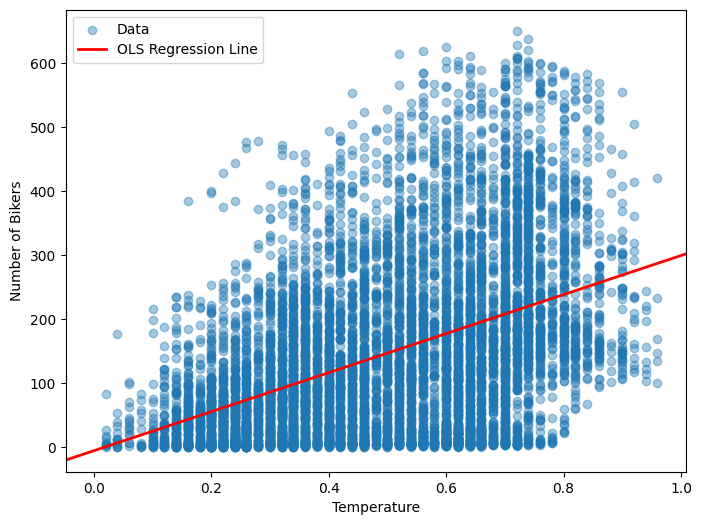

In [8]:
intercept, slope = model.params
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(Bikeshare['temp'], Bikeshare['bikers'], alpha=0.4, label='Data')
ax.axline(xy1=(0, intercept), slope=slope, color='red', linewidth=2, label='OLS Regression Line')
ax.set_xlabel('Temperature')
ax.set_ylabel('Number of Bikers')
ax.legend()
plt.show()

h.

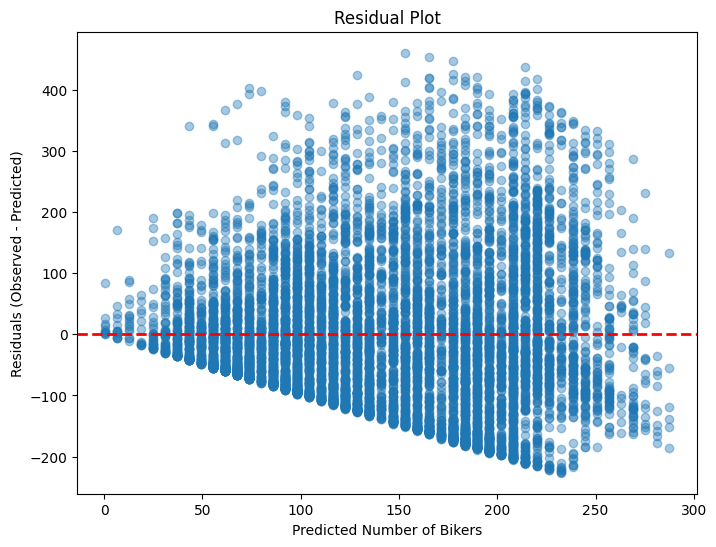

In [9]:
y_predicted = model.fittedvalues
residuals = model.resid
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_predicted, residuals, alpha=0.4)
ax.axhline(0, color='red', linestyle='--', linewidth=2)

ax.set_xlabel("Predicted Number of Bikers")
ax.set_ylabel("Residuals (Observed - Predicted)")
ax.set_title("Residual Plot")
plt.show()

Question 3

In [10]:
Bikeshare['hr'] = pd.to_numeric(Bikeshare['hr'], errors='coerce')

a. 

In [11]:
corr_matrix = Bikeshare.corr(numeric_only=True)
print(corr_matrix)

              season       day        hr   holiday   weekday  workingday  \
season      1.000000  0.825218 -0.012179 -0.001116 -0.013639    0.013763   
day         0.825218  1.000000 -0.011560  0.030972  0.010990    0.003277   
hr         -0.012179 -0.011560  1.000000 -0.000929 -0.005618    0.003792   
holiday    -0.001116  0.030972 -0.000929  1.000000 -0.076324   -0.247934   
weekday    -0.013639  0.010990 -0.005618 -0.076324  1.000000    0.018572   
workingday  0.013763  0.003277  0.003792 -0.247934  0.018572    1.000000   
temp        0.343535  0.261316  0.120548 -0.020059 -0.038969    0.053405   
atemp       0.351910  0.273091  0.116382 -0.026915 -0.042439    0.052551   
hum         0.191793  0.189453 -0.251188 -0.022895 -0.051307    0.025305   
windspeed  -0.154735 -0.154169  0.125153  0.000502  0.039586    0.010509   
casual      0.141894  0.090982  0.303720  0.052906 -0.013475   -0.324750   
registered  0.220666  0.185044  0.390313 -0.046779 -0.000500    0.129540   
bikers      

b.

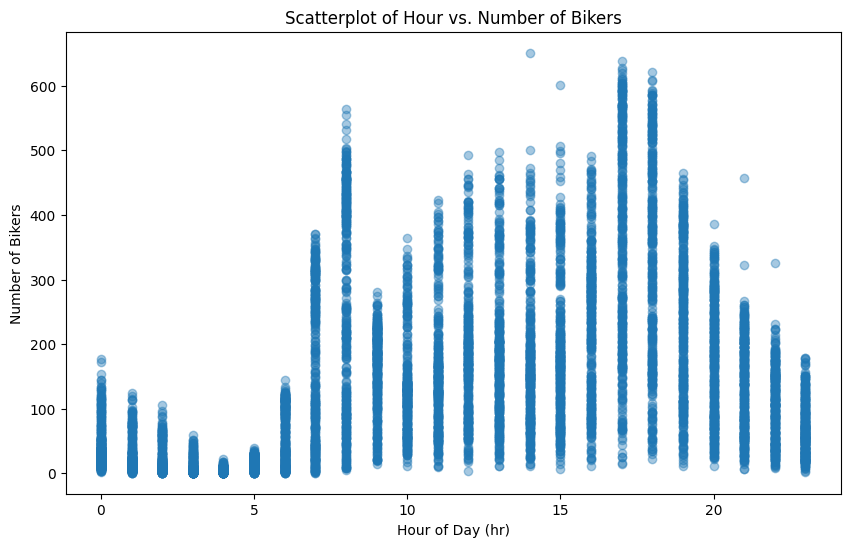

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(Bikeshare['hr'], Bikeshare['bikers'], alpha=0.4)

ax.set_xlabel("Hour of Day (hr)")
ax.set_ylabel("Number of Bikers")
ax.set_title("Scatterplot of Hour vs. Number of Bikers")
plt.show()

c.

In [13]:
x = sm.add_constant(Bikeshare['hr'])
y = Bikeshare['bikers']

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:50:10   Log-Likelihood:                -53810.
No. Observations:                8645   AIC:                         1.076e+05
Df Residuals:                    8643   BIC:                         1.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4482      2.564     20.453      0.0

In [14]:
y_pred = model.fittedvalues
residuals = model.resid

MSE = np.mean(residuals**2)
print(f"MSE: {MSE}")

MSE: 14927.622307978461


d.

In [15]:
Bikeshare['hr2'] = Bikeshare['hr']**2
X = Bikeshare[['hr','hr2']]
X = sm.add_constant(X)
y = Bikeshare['bikers']
model_quad = sm.OLS(y, X).fit()
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1898.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:50:10   Log-Likelihood:                -53021.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8642   BIC:                         1.061e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.4378      3.336    -13.918      0.0

In [22]:
y_pred = model_quad.fittedvalues
residuals = model_quad.resid

MSE_quad = np.mean(residuals**2)
print(f"The quadratic MSE is {MSE_quad}")

The quadratic MSE is 12437.720822189807


e.

In [20]:
Bikeshare['workingday'] = pd.to_numeric(Bikeshare['workingday'])
Bikeshare['hr_workingday'] = Bikeshare['hr'] * Bikeshare['workingday']
X = Bikeshare[['hr', 'hr2', 'workingday', 'hr_workingday']]
X = sm.add_constant(X)
y = Bikeshare['bikers']

model_int = sm.OLS(y,X).fit()

print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     950.8
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:57:05   Log-Likelihood:                -53018.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8640   BIC:                         1.061e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -41.9017      4.777     -8.771

In [21]:
y_pred = model_int.fittedvalues
residuals = model_int.resid

MSE_int = np.mean(residuals**2)
print(f"The quadratic MSE is {MSE_int}")

The quadratic MSE is 12428.95706672807


f.

In [24]:
X = Bikeshare[['hr', 'hr2', 'workingday', 'hr_workingday', 'temp']]
X = sm.add_constant(X)
y = Bikeshare['bikers']

model_all = sm.OLS(y,X).fit()

print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1362.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:59:33   Log-Likelihood:                -52083.
No. Observations:                8645   AIC:                         1.042e+05
Df Residuals:                    8639   BIC:                         1.042e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -139.8046      4.793    -29.170

In [25]:
y_pred = model_all.fittedvalues
residuals = model_all.resid

MSE_all = np.mean(residuals**2)
print(f"The quadratic MSE is {MSE_all}")

The quadratic MSE is 10009.578912400699


g. I would expect the MSE to decrease on the training set.

h. I think the model which includes quadratic and interaction between working day and hour would have the best performance. I think that if we added more variables to the model we could overfit and the model would not perform well on the new data.